In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries imported successfully")


All libraries imported successfully


In [3]:
# Loading the Dataset

splits = {'train': 'train.csv', 'validation': 'validation.csv', 'test': 'test.csv'}
df = pd.read_csv("https://huggingface.co/datasets/aai510-group1/telco-customer-churn/resolve/main/train.csv")

In [4]:
print("Dataset loaded successfully")

Dataset loaded successfully


In [5]:
# Display first few rows to confirm it loaded correctly
print(df.head())

   Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  \
0   72                        4                              19.44   
1   27                       59                              45.62   
2   59                        0                              16.07   
3   25                       27                               0.00   
4   31                       21                              17.22   

    Churn Category         Churn Reason  Churn Score          City  CLTV  \
0              NaN                  NaN           51     San Mateo  4849   
1              NaN                  NaN           27  Sutter Creek  3715   
2              NaN                  NaN           59    Santa Cruz  5092   
3              NaN                  NaN           49          Brea  2068   
4  Dissatisfaction  Network reliability           88      San Jose  4026   

         Contract        Country  ... Tenure in Months Total Charges  \
0        Two Year  United States  ...             

In [6]:
# Explore the dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

In [7]:
# Checking for the missing values
print(df.isnull().sum())

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       3104
Churn Reason                         3104
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                         886
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

In [8]:
# Describe the Numerical feature
print(df.describe())

               Age  Avg Monthly GB Download  \
count  4225.000000              4225.000000   
mean     46.451124                20.740828   
std      16.731518                20.366105   
min      19.000000                 0.000000   
25%      32.000000                 4.000000   
50%      46.000000                17.000000   
75%      60.000000                27.000000   
max      80.000000                85.000000   

       Avg Monthly Long Distance Charges  Churn Score         CLTV  \
count                        4225.000000  4225.000000  4225.000000   
mean                           22.766963    58.281183  4409.751243   
std                            15.429992    21.197931  1170.599119   
min                             0.000000     5.000000  2003.000000   
25%                             9.050000    40.000000  3493.000000   
50%                            22.570000    61.000000  4531.000000   
75%                            36.170000    75.000000  5381.000000   
max             

In [11]:
print(df.columns)

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')


In [ ]:
# Analyse Categorical features
print(df['Churn Category'].value_counts())

Churn Category
Competitor         486
Attitude           200
Dissatisfaction    171
Other              134
Price              130
Name: count, dtype: int64


In [14]:
print(df.columns)

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')


In [15]:
df.columns = df.columns.str.strip()

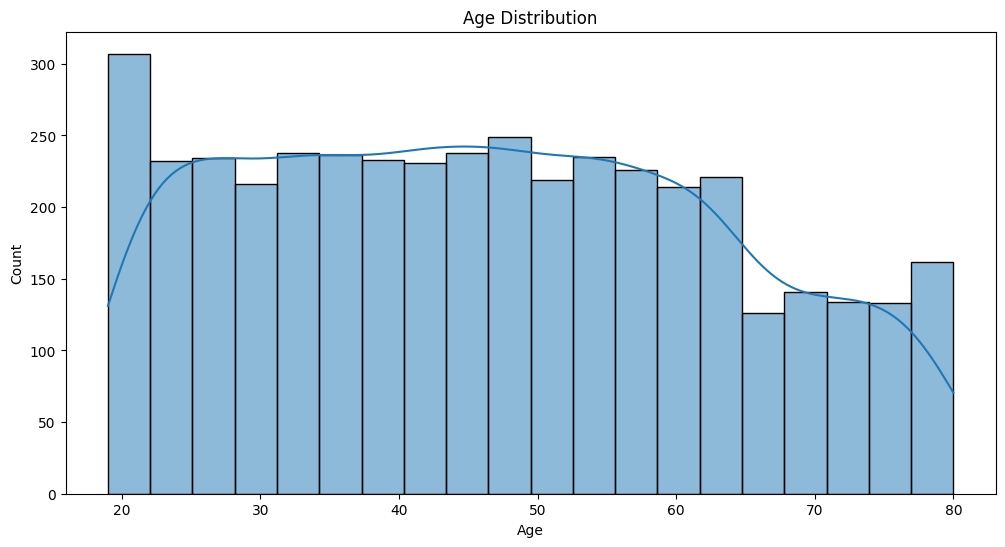

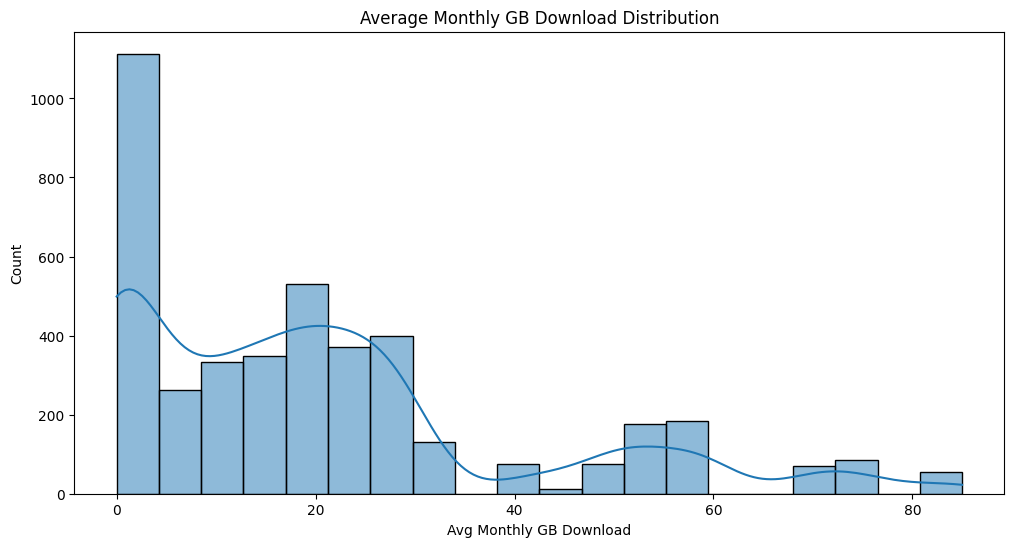

In [ ]:
# visualise data distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Avg Monthly GB Download'], bins=20, kde=True)
plt.title('Average Monthly GB Download Distribution')
plt.show()

In [34]:
df['High Data Usage'] = df['Avg Monthly GB Download'] > df['Avg Monthly GB Download'].mean()
print("High Data Usage column created successfully.")
print(df[['Avg Monthly GB Download', 'High Data Usage']].head())

High Data Usage column created successfully.
   Avg Monthly GB Download  High Data Usage
0                        4            False
1                       59             True
2                        0            False
3                       27             True
4                       21             True


In [38]:
# identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Churn Reason', 'City', 'Country', 'Customer ID', 'Customer Status',
       'Gender', 'Lat Long', 'Offer', 'Payment Method', 'Quarter', 'State'],
      dtype='object')


In [39]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Categorical data encoded successfully.")
print(df_encoded.head())

Categorical data encoded successfully.
   Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  \
0   72                        4                              19.44   
1   27                       59                              45.62   
2   59                        0                              16.07   
3   25                       27                               0.00   
4   31                       21                              17.22   

   Churn Score  CLTV  Dependents  Device Protection Plan   Latitude  \
0           51  4849           0                       1  37.538309   
1           27  3715           0                       1  38.432145   
2           59  5092           0                       0  37.007882   
3           49  2068           0                       1  33.924143   
4           88  4026           0                       1  37.311088   

    Longitude  Married  ...  Lat Long_41.932207, -120.135941  \
0 -122.305109        1  ...                      

In [40]:
# verify encoding
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Columns: 7010 entries, Age to Payment Method_Mailed Check
dtypes: bool(6972), float64(8), int64(30)
memory usage: 29.3 MB
None


In [47]:
# Analyse the customer reason
churn_reasons = df['Churn Reason'].value_counts()
print(churn_reasons)

Churn Reason
Competitor had better devices                188
Competitor made better offer                 187
Attitude of support person                   136
Don't know                                    87
Attitude of service provider                  64
Competitor offered more data                  57
Competitor offered higher download speeds     54
Network reliability                           46
Price too high                                44
Product dissatisfaction                       42
Long distance charges                         39
Moved                                         32
Service dissatisfaction                       32
Extra data charges                            27
Limited range of services                     25
Lack of affordable download/upload speed      20
Lack of self-service on Website               17
Poor expertise of online support              14
Deceased                                       6
Poor expertise of phone support                4
Name: c

In [ ]:
# Average monthly charges by internet service
avg_charges_by_internet = df.groupby('Internet Service_1')['Avg Monthly Long Distance Charges'].mean()
print(avg_charges_by_internet)

Internet Service_1
False    24.471591
True     22.314642
Name: Avg Monthly Long Distance Charges, dtype: float64


In [50]:
# Analyse customer status distribution
status_distribution = df['Customer Status'].value_counts()
print(status_distribution)

Customer Status
Stayed     2832
Churned    1121
Joined      272
Name: count, dtype: int64


In [51]:
# Understanding Churn reason
churn_reasons = df['Churn Reason'].value_counts()
print("Top Reasons for Customer Churn:")
print(churn_reasons.head(5))

Top Reasons for Customer Churn:
Churn Reason
Competitor had better devices    188
Competitor made better offer     187
Attitude of support person       136
Don't know                        87
Attitude of service provider      64
Name: count, dtype: int64


In [53]:
# Analysing internet service type
internet_type_counts = df['Internet Type_DSL'].value_counts()
print("\nInternet Service Types Distribution:")
print(internet_type_counts)


Internet Service Types Distribution:
Internet Type_DSL
False    3217
True     1008
Name: count, dtype: int64


In [56]:
# Average monthly charges by contract type
avg_monthly_charges = df.groupby(['Contract_One Year', 'Contract_Two Year'])['Avg Monthly Long Distance Charges'].mean()
print("\nAverage Monthly Charges by Contract Type:")
print(avg_monthly_charges)


Average Monthly Charges by Contract Type:
Contract_One Year  Contract_Two Year
False              False                22.586936
                   True                 22.187048
True               False                23.927301
Name: Avg Monthly Long Distance Charges, dtype: float64


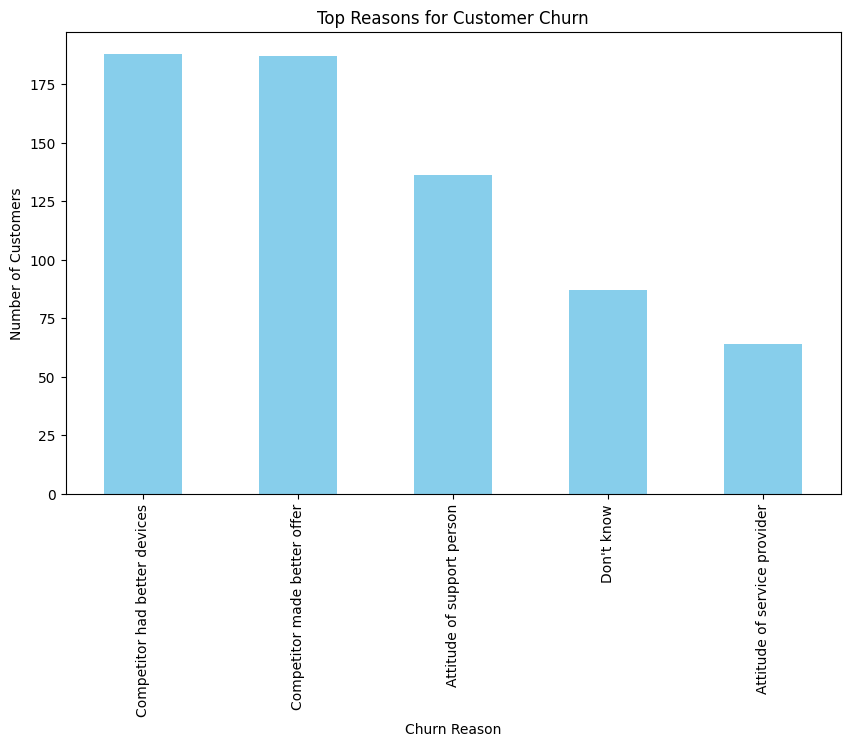

In [57]:
# Bar Plot: Top reason for customers Churn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top reasons for churn
plt.figure(figsize=(10, 6))
churn_reasons.head(5).plot(kind='bar', color='skyblue')
plt.title('Top Reasons for Customer Churn')
plt.xlabel('Churn Reason')
plt.ylabel('Number of Customers')
plt.show()

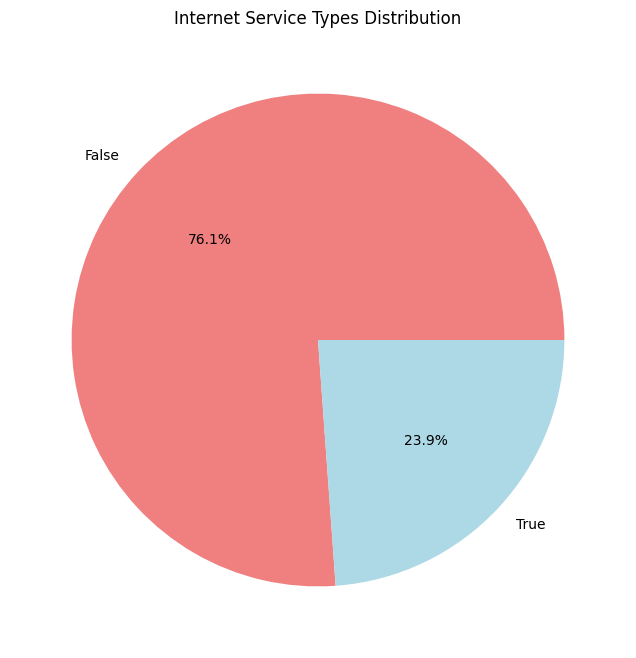

In [58]:
# Pie Chart : internet service types distribution
# Plot internet service type distribution
plt.figure(figsize=(8, 8))
internet_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Internet Service Types Distribution')
plt.ylabel('')
plt.show()

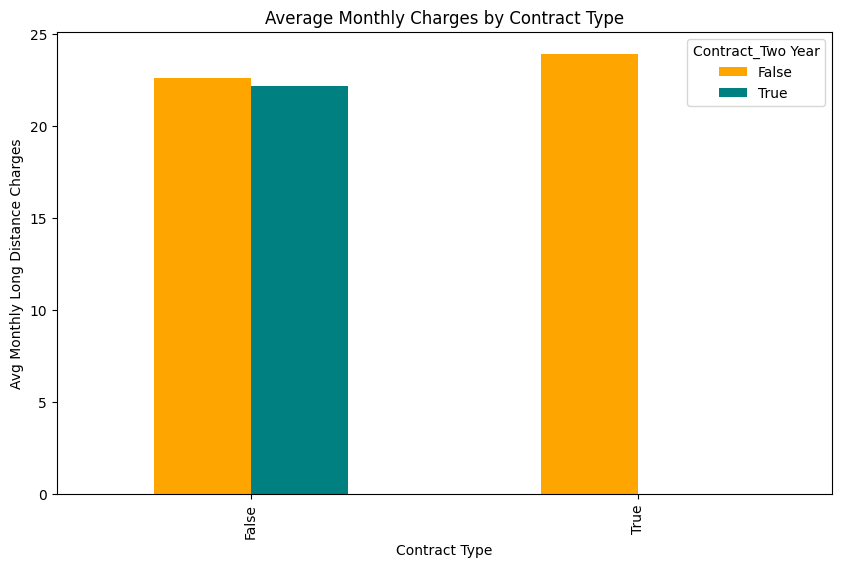

In [59]:
# Bar plot : Average monthly charges by contract type
# Plot average monthly charges by contract type
avg_monthly_charges.unstack().plot(kind='bar', figsize=(10, 6), color=['orange', 'teal'])
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Avg Monthly Long Distance Charges')
plt.show()

In [ ]:
# Create a correlation matrix
correlation_matrix = df_encoded.corr()
# Display the first few rows
print("Correlation Matrix:")
print(correlation_matrix.head())

In [ ]:
# Define a function to detect outliers using IQR
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Detect outliers
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

# Check for outliers
outliers = detect_outliers(df_encoded)
print("Outliers detected per column:")
print(outliers)

In [35]:
for col in df.columns:
    print(col)

Age
Avg Monthly GB Download
Avg Monthly Long Distance Charges
Churn Reason
Churn Score
City
CLTV
Country
Customer ID
Customer Status
Dependents
Device Protection Plan
Gender
Lat Long
Latitude
Longitude
Married
Monthly Charge
Multiple Lines
Number of Dependents
Number of Referrals
Offer
Online Backup
Online Security
Paperless Billing
Partner
Payment Method
Phone Service
Population
Premium Tech Support
Quarter
Referred a Friend
Satisfaction Score
Senior Citizen
State
Streaming Movies
Streaming Music
Streaming TV
Tenure in Months
Total Charges
Total Extra Data Charges
Total Long Distance Charges
Total Refunds
Total Revenue
Under 30
Unlimited Data
Zip Code
Churn
High_Data_Usage
Contract_One Year
Contract_Two Year
Internet Service_1
Internet Type_DSL
Internet Type_Fiber Optic
Churn Category_Competitor
Churn Category_Dissatisfaction
Churn Category_Other
Churn Category_Price
High Data Usage


In [44]:
print(df.columns)

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Reason', 'Churn Score', 'City', 'CLTV', 'Country', 'Customer ID',
       'Customer Status', 'Dependents', 'Device Protection Plan', 'Gender',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn', 'High_Data_Usage', 'Contract_One Year',
       'Contract_Two Year', 'Internet Service_1', 'Interne